In [1]:
#Adding dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import g_key
import pycountry
import requests
import json
import gmaps
from scipy.stats import linregress

In [40]:
#opening covid data
covid_data=pd.read_csv("data/worldometer_coronavirus_daily_data.csv")

<h1>Analysis of Covid situation in UK</h1>

In [58]:
#selecting data only relevant to UK
uk_covid=covid_data[covid_data["country"]=="UK"]
uk_covid.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
136023,2020-02-15,UK,9.0,NaN,1.0,0.0,NaN
136024,2020-02-16,UK,9.0,0.0,1.0,0.0,NaN
136025,2020-02-17,UK,9.0,0.0,1.0,0.0,NaN
136026,2020-02-18,UK,9.0,0.0,1.0,0.0,NaN
136027,2020-02-19,UK,9.0,0.0,1.0,0.0,NaN


<h3>Daily new Covid cases in UK</h3>

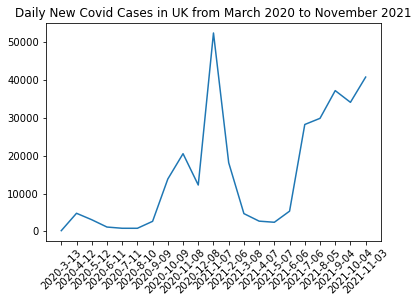

In [4]:
#selecting data from every 30th row to display monthly situation
uk_covid2 = uk_covid[uk_covid.index % 30== 0]
date=uk_covid2["date"]
daily_new_cases=uk_covid2["daily_new_cases"]
#plotting line graph of daily cases
plt.plot(date, daily_new_cases)
plt.title("Daily New Covid Cases in UK from March 2020 to November 2021")
plt.xticks(rotation=45)
plt.show()

<h3>Daily Deaths in UK</h3>

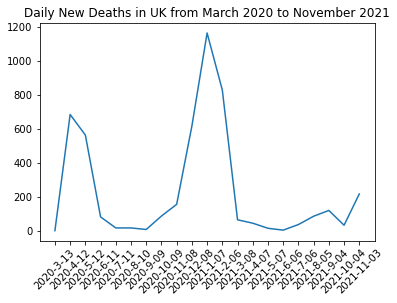

In [5]:
#plotting line graph of daily deaths
daily_new_deaths=uk_covid2["daily_new_deaths"]
date=uk_covid2["date"]
plt.plot(date, daily_new_deaths)
plt.title("Daily New Deaths in UK from March 2020 to November 2021")
plt.xticks(rotation=45)
plt.show()

<h3>Daily new cases vs daily deaths in UK</h3>

Text(0.5, 1.0, 'UK Daily New Cases vs Deaths')

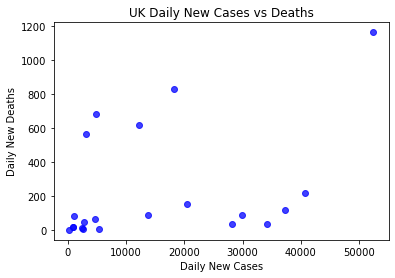

In [6]:
#plotting scatter plot of daily new cases vs new deaths
plt.scatter(daily_new_cases,daily_new_deaths, marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Daily New Cases")
plt.ylabel("Daily New Deaths")
plt.title("UK Daily New Cases vs Deaths")

The r-squared is: 0.13382632711853648


Text(0.5, 1.0, 'UK Daily New Cases vs Deaths')

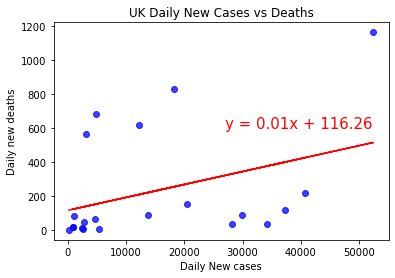

In [7]:
#adding linear regression to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(daily_new_cases, daily_new_deaths)
regress_values=daily_new_cases*slope+intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(daily_new_cases,daily_new_deaths, marker="o", facecolors="blue", alpha=0.75)
plt.plot(daily_new_cases,regress_values,"r-")
plt.annotate(line_eq,(27000,600),fontsize=15, color="red")
plt.xlabel("Daily New cases")
plt.ylabel("Daily new deaths")
print(f"The r-squared is: {rvalue**2}")
plt.title("UK Daily New Cases vs Deaths")

R-squared value reall low indicating not strong correlation between Daily New Cases and Daily Deaths in UK

<h1>Analysis of Covid situation in Kenya</h1>

In [21]:
#selecting data relevant to Kenya from the main data frame
kenya_covid=covid_data[covid_data["country"]=="Kenya"]
kenya_covid.to_csv("Covid_Kenya.csv", index=False, header=True)
kenya_covid.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
69009,2020-2-15,Kenya,0.0,NaN,0.0,0.0,NaN
69010,2020-2-16,Kenya,0.0,NaN,0.0,0.0,NaN
69011,2020-2-17,Kenya,0.0,NaN,0.0,0.0,NaN
69012,2020-2-18,Kenya,0.0,NaN,0.0,0.0,NaN
69013,2020-2-19,Kenya,0.0,NaN,0.0,0.0,NaN


<h3>Daily Covid Cases in Kenya</h3>

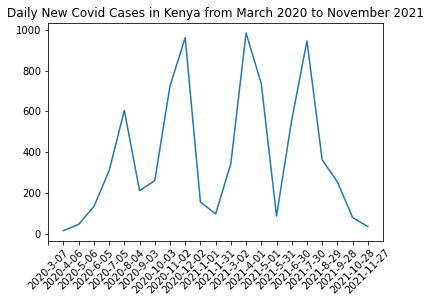

In [9]:
# selecting every 30th row to show data for each month
kenya_covid2 = kenya_covid[kenya_covid.index % 30== 0]
date2=kenya_covid2["date"]
daily_new_cases_kenya=kenya_covid2["daily_new_cases"]
#plotting line graph showing daily new cases
plt.plot(date2, daily_new_cases_kenya)
plt.title("Daily New Covid Cases in Kenya from March 2020 to November 2021")
plt.xticks(rotation=45)
plt.show()

<h3>Daily Deaths in Kenya</h3>

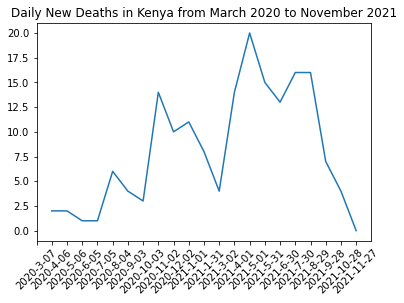

In [10]:
#plotting line graph of daily deaths in UK
daily_new_deaths_kenya=kenya_covid2["daily_new_deaths"]
date2=kenya_covid2["date"]
plt.plot(date2, daily_new_deaths_kenya)
plt.title("Daily New Deaths in Kenya from March 2020 to November 2021")
plt.xticks(rotation=45)
plt.show()

<h3>Daily Cases vs Deaths in Kenya</h3>

Text(0.5, 1.0, 'Kenya Daily New Cases vs Deaths')

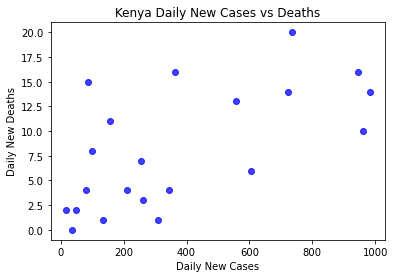

In [11]:
# dropping all nan values
daily_new_cases_kenya=daily_new_cases_kenya.dropna()
daily_new_deaths_kenya=daily_new_deaths_kenya.dropna()
#scatter plot of daily cases vs daily deaths
plt.scatter(daily_new_cases_kenya,daily_new_deaths_kenya, marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Daily New Cases")
plt.ylabel("Daily New Deaths")
plt.title("Kenya Daily New Cases vs Deaths")

The r-squared is: 0.39689193890124497


<function matplotlib.pyplot.show(close=None, block=None)>

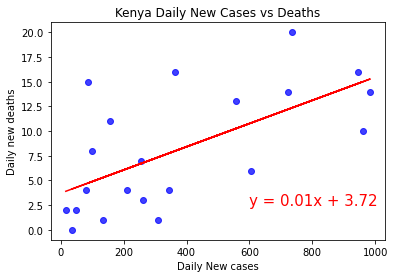

In [12]:
#adding linear regression to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(daily_new_cases_kenya, daily_new_deaths_kenya)
regress_values=daily_new_cases_kenya*slope+intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Daily New cases")
plt.ylabel("Daily new deaths")
print(f"The r-squared is: {rvalue**2}")
plt.title("Kenya Daily New Cases vs Deaths")
plt.scatter(daily_new_cases_kenya,daily_new_deaths_kenya, marker="o", facecolors="blue", alpha=0.75)
plt.plot(daily_new_cases_kenya,regress_values,"r-")
plt.annotate(line_eq,(600,2.5),fontsize=15, color="red")
plt.show

The r-squared value is relatively low suggesting now strong correlation between variables.

<h2> Looking into number of cases vs vaccination rate in Kenya and UK</h2>

In [49]:
#importing vaccination data set
vaccine_data=pd.read_csv("data/country_vaccinations.csv")
#setting date to the format to enable merging
vaccine_data["date"]=pd.to_datetime(vaccine_data.date)
covid_data["date"]=pd.to_datetime(covid_data.date)

In [66]:
kenya_vaccine=vaccine_data[vaccine_data["country"]=="Kenya"]
kenya_covid=covid_data[covid_data["country"]=="Kenya"]

In [82]:
#merging two datasets for Kenya to display full dataframe of vaccination and covid cases
kenya_merged=pd.merge(kenya_vaccine,kenya_covid, on="date")
kenya_merged=kenya_merged.dropna()
kenya_merged.head()

,country_x,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,daily_vaccinations_per_million,vaccines,source_name,source_website,country_y,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
91,Kenya,KEN,2021-06-03,973987.0,972601.0,1386.0,2273.0,1535.0,1.81,1.81,...,29.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,171658.0,432.0,10200.0,3223.0,17.0
92,Kenya,KEN,2021-06-04,976541.0,974000.0,2541.0,2554.0,1444.0,1.82,1.81,...,27.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,171942.0,284.0,10300.0,3240.0,17.0
93,Kenya,KEN,2021-06-05,981887.0,975265.0,6622.0,5346.0,1879.0,1.83,1.81,...,35.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,172325.0,383.0,10615.0,3264.0,24.0
94,Kenya,KEN,2021-06-06,983580.0,975399.0,8181.0,1693.0,2052.0,1.83,1.81,...,38.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,172491.0,166.0,10633.0,3287.0,23.0
95,Kenya,KEN,2021-06-07,989029.0,975835.0,13194.0,5449.0,2762.0,1.84,1.81,...,51.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://twitter.com/MOH_Kenya/status/140662760...,Kenya,172639.0,148.0,9909.0,3308.0,21.0


Text(0, 0.5, 'Daily Vaccinations')

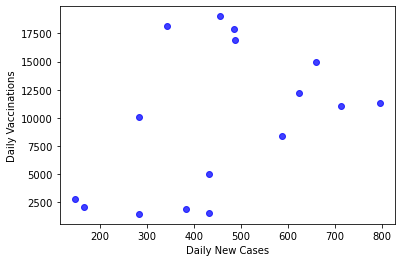

In [86]:
#scatter plot of daily cases vs daily vaccination in Kenya
kenya_merged_vacc=kenya_merged["daily_vaccinations"]
kenya_merged_cases=kenya_merged["daily_new_cases"]
plt.scatter(kenya_merged_cases,kenya_merged_vacc, marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Daily New Cases")
plt.ylabel("Daily Vaccinations")

The r-squared is: 0.2037173491309611


<function matplotlib.pyplot.show(close=None, block=None)>

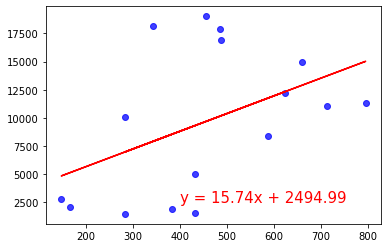

In [89]:
#adding linear regression to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(kenya_merged_cases, kenya_merged_vacc)
regress_values=kenya_merged_cases*slope+intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(kenya_merged_cases,kenya_merged_vacc, marker="o", facecolors="blue", alpha=0.75)
plt.plot(kenya_merged_cases,regress_values,"r-")
plt.annotate(line_eq,(400,2500),fontsize=15, color="red")
plt.show

In [ ]:
covid_summary=pd.read_csv("data/worldometer_coronavirus_summary_data.csv")
uk_summary=covid_summary[covid_summary["country"]=="UK"]
uk_covid=uk_summary[["total_confirmed","total_deaths","total_recovered"]]
uk_covid

In [ ]:
uk_chart = uk_covid.plot(kind="bar", title="UK Covid summary")
uk_chart.set_ylabel("Number of cases")
plt.show()
plt.tight_layout()

In [ ]:
uk_fully_vacc=uk["people_fully_vaccinated"]
uk_date=uk["date"]
x_axis=uk_date
plt.scatter(x_axis, uk_fully_vacc, marker="o")

In [ ]:
kenya=vaccine_data[vaccine_data["country"]=="Kenya"]
kenya_fully_vacc=kenya["people_fully_vaccinated"]
kenya_date=kenya["date"]
x_axis=kenya_date
plt.scatter(x_axis, kenya_fully_vacc, marker="o")